#### Prerequisites

**Note:** Before your the cells below, make sure to choose Python 3 (TensorFlow 2.3 Python 3.7 CPU Optimized)

In [1]:
%%capture

!pip install bbox-visualizer
!pip install matplotlib

#### Imports 

In [9]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (20, 10)

In [10]:
import bbox_visualizer as bbv
import logging
import json
import cv2

In [11]:
logger = logging.getLogger('__name__')
logger.setLevel(logging.DEBUG)
logger.addHandler(logging.StreamHandler())

### Explore images with bounding boxes for facial mask detection

In [5]:
with open('./data/annotations.json') as f:
    annotations_dict = json.load(f)
images_list = annotations_dict['images']
annotations_list = annotations_dict['annotations']

In [6]:
def find_bboxes(id_):
    bboxes = []
    for annotation in annotations_list:
        if annotation['image_id'] == id_:
            bboxes.append(annotation['bbox'])
    return bboxes

In [12]:
def show_image_with_bboxes(file_name, bboxes):
    img = cv2.imread(f'./data/images/{file_name}')
    logger.info(f'Image: {file_name}')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = bbv.draw_multiple_rectangles(img, bboxes)
    plt.imshow(img)
    plt.show()

Image: 1.png


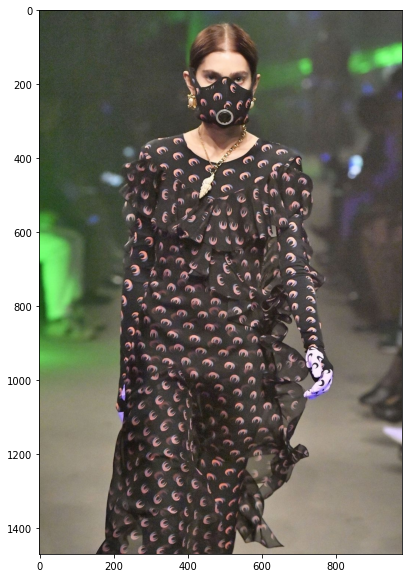

Image: 2.png


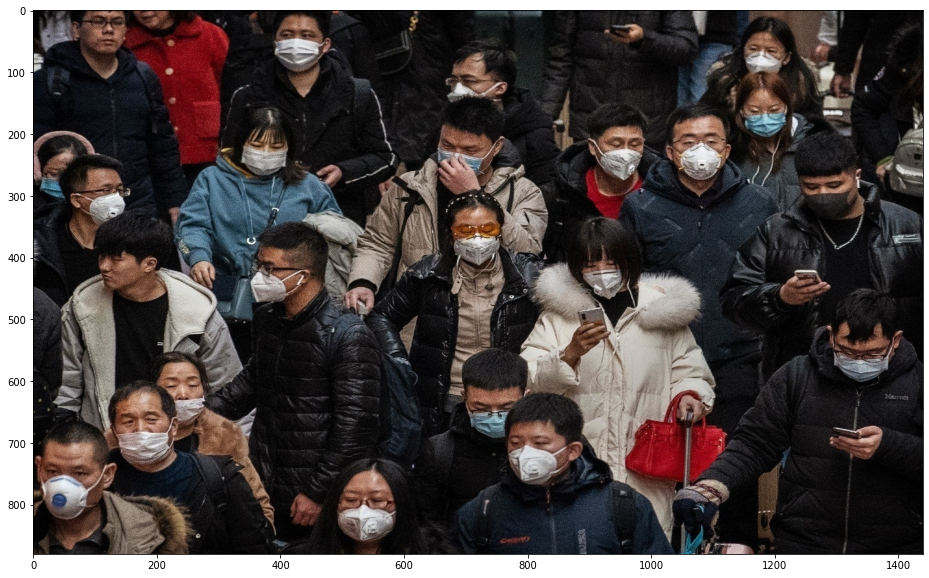

Image: 3.png


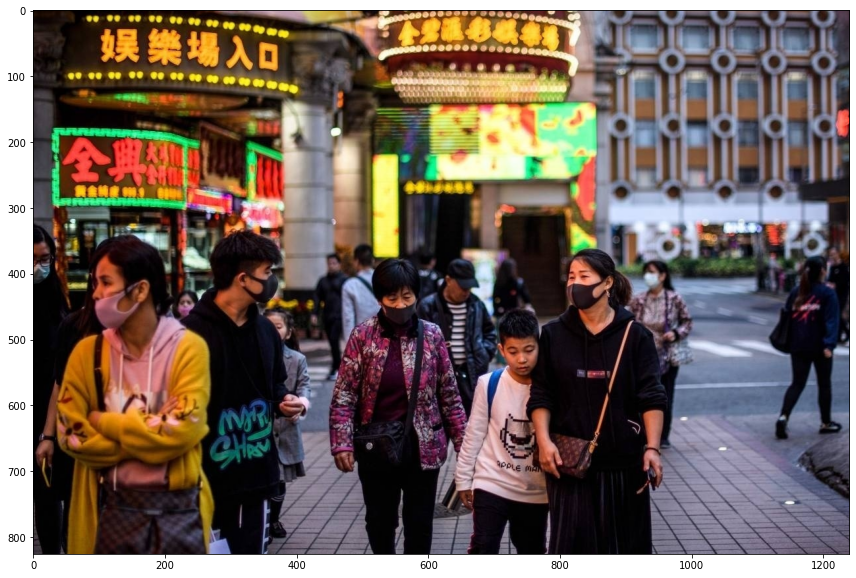

Image: 4.png


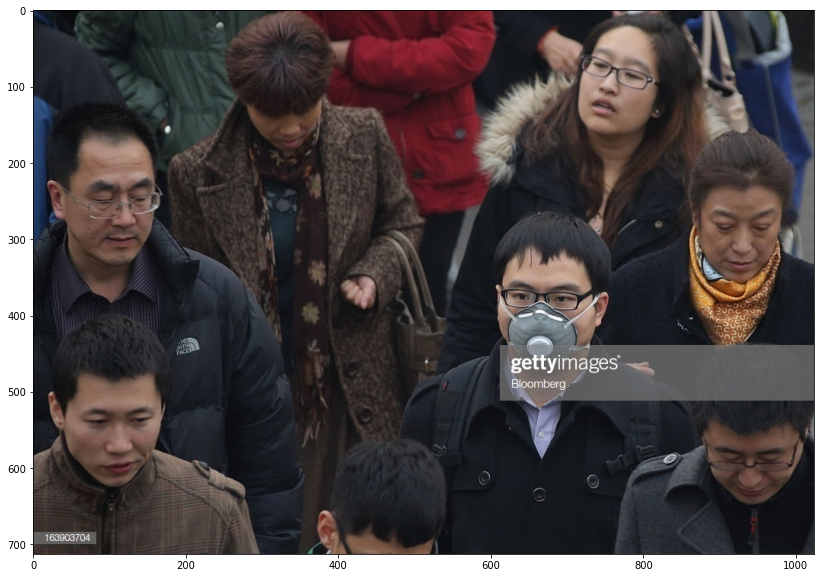

Image: 5.png


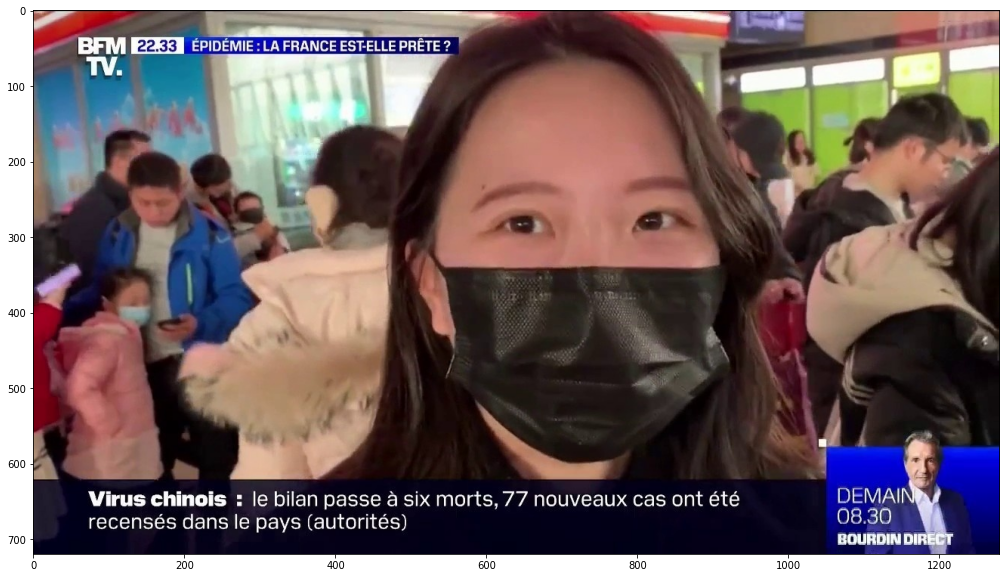

Image: 6.png


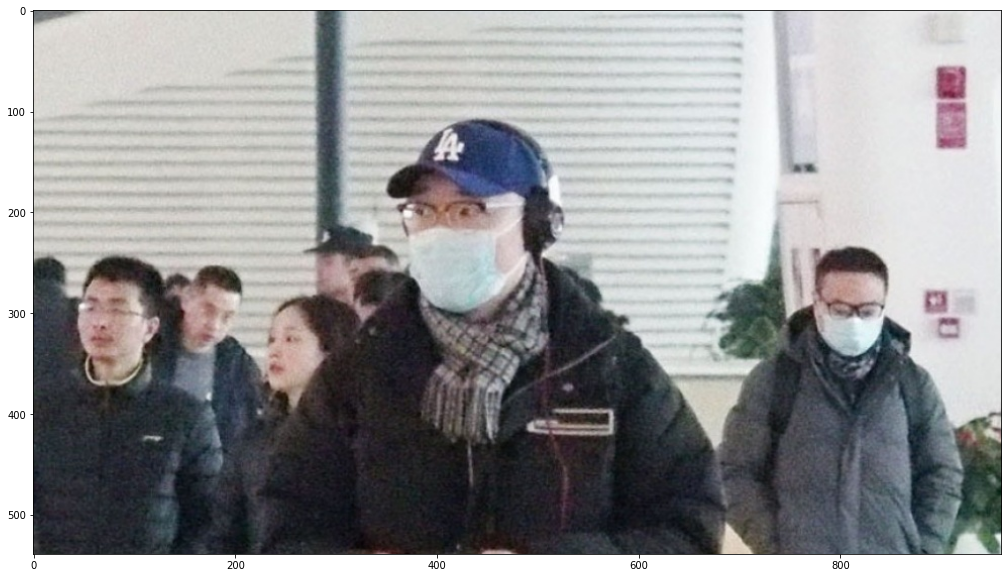

In [13]:
i = 0
for image, annotations in zip(images_list, annotations_list):
    file_name = image['file_name']
    bboxes = find_bboxes(file_name)
    show_image_with_bboxes(file_name, bboxes)
    if i == 5:
        break
    i += 1